 ***Problem Understanding***

Small basket is an online grocery retail store in india.This online store  wants us to predict the demand of different items at multiple locations so that they can increase their profits by purchasing exactly the same number of items from the factory which massively increases their products and also saves a lot of perishable items from decaying.



---
##About the data:-
The data i have received from the small basket consists of four data sets which are

1.   ***train.csv***:-This dataset holds the data  of the number of units of an item sold at a particualr date,at a particular location and if the item is brought on promotion or without promotion.

2.   ***train_transactions.csv***:-This dataset holds the data of the number of transaction made at a particular location on a particular date.

3.   ***items.csv***:-This dataset holds the data of different items,their category,class and wheather the item is persihable or not.
4.   ***locations.csv***:-This data holds the data of location of the warehouse,city and state where this unit belongs to,type and cluster this buisness unit belongs to.


***Evalution metric for this is MAPE(Mean absolute percentage error)
MAPE= 1/n summation(|actual|-|forecast|)/|actual|)*100







In [0]:
import pandas as pd

# Mounting it to another google drive just to increase the RAM to 35 GB.

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#cd "/content/drive/My Drive/"

## Reading the data

In [0]:
train=pd.read_csv('train (1).csv')
train_trans=pd.read_csv('train_transactions.csv')
item_details=pd.read_csv('item_details.csv')
location_details=pd.read_csv('location_details.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Peeking into the data

In [0]:
train.tail(50)

,date,locationId,item_id,unit_sales,onpromotion
101688729,2018-12-31,location_54,item_2017241,8.0,False
101688730,2018-12-31,location_54,item_2018358,3.0,True
101688731,2018-12-31,location_54,item_2018397,3.0,False
101688732,2018-12-31,location_54,item_2018471,2.0,False
101688733,2018-12-31,location_54,item_2018612,6.0,True
101688734,2018-12-31,location_54,item_2018690,1.0,False
101688735,2018-12-31,location_54,item_2019084,17.0,True
101688736,2018-12-31,location_54,item_2026256,6.0,False
101688737,2018-12-31,location_54,item_2026444,3.0,False
101688738,2018-12-31,location_54,item_2026454,17.0,False


In [0]:
train.describe()

,unit_sales
count,1.016888e+08
mean,8.647890e+00
std,2.349533e+01
min,-1.537200e+04
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,8.944000e+04


In [0]:
train_trans.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [0]:
train_trans.describe()

,transactions
count,71391.000000
mean,1701.598367
std,968.125835
min,5.000000
25%,1049.000000
50%,1397.000000
75%,2100.000000
max,8359.000000


In [0]:
location_details.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [0]:
item_details.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


## Getting to know the data.

inspect_data is a function which displays 


1:Null values

2:No of Levels

3:Number of unique levels


In [0]:
#Function to find number of Null values,No of levels and unique levels in the data set
def inspect_data(data) :
      return pd.DataFrame({"Data type": data.dtypes,"NUll Values": data.isnull().sum(),
                           "No of Levels": data.apply(lambda x: str(x.nunique()),axis=0),
                          "Levels": data.apply(lambda x: str(x.unique()),axis=0)})
 

In [0]:
inspect_data(train)

,Data type,NUll Values,No of Levels,Levels
date,object,0,1456,['2015-01-01' '2015-01-02' '2015-01-03' ... '2...
locationId,object,0,53,['location_25' 'location_1' 'location_2' 'loca...
item_id,object,0,3890,['item_103665' 'item_105574' 'item_105575' ......
unit_sales,float64,0,244090,[7.0 1.0 2.0 ... 279.395 145.60299999999995 18...
onpromotion,object,21657651,2,[nan False True]


In [0]:
inspect_data(location_details)

,Data type,NUll Values,No of Levels,Levels
location_id,object,0,54,['location_1' 'location_2' 'location_3' 'locat...
city,object,0,22,['Bengaluru' 'Delhi' 'Kolkata' 'Noida' 'Vijaya...
state,object,0,13,['Karnataka' 'NCR' 'West Bengal' 'Uttar Prades...
type,object,0,5,['D' 'B' 'C' 'E' 'A']
cluster,int64,0,17,[13 8 9 4 6 15 7 3 12 16 1 10 2 5 11 14 17]


In [0]:
inspect_data(item_details)

,Data type,NUll Values,No of Levels,Levels
item_id,object,0,4100,['item_96995' 'item_99197' 'item_103501' ... '...
category_of_item,object,0,30,['grocery_items' 'cleaning_utilities' 'baked_i...
class,object,0,337,['class_1093' 'class_1067' 'class_3008' 'class...
perishable,int64,0,2,[0 1]


In [0]:
inspect_data(train_trans)

,Data type,NUll Values,No of Levels,Levels
date,object,0,1454,['2015-01-01' '2015-01-02' '2015-01-03' ... '2...
location_identifier,object,0,53,['location_25' 'location_1' 'location_2' 'loca...
transactions,int64,0,4912,[770 2111 2358 ... 5598 5304 5259]


In [0]:

number_of_location_train=train['locationId'].nunique()
number_of_locatins_location_details=location_details['location_id'].nunique()
import matplotlib.pyplot as plt
import seaborn as sns
x=[number_of_location_train,number_of_locatins_location_details]
y=['number_of_location_train','number_of_locatins_location_details']

In [0]:

data = [['number_of_location_train', number_of_location_train], ['number_of_locatins_location_details', number_of_locatins_location_details]]
d=pd.DataFrame(data,columns=['name','frequency'])
d

,name,frequency
0,number_of_location_train,53
1,number_of_locatins_location_details,54


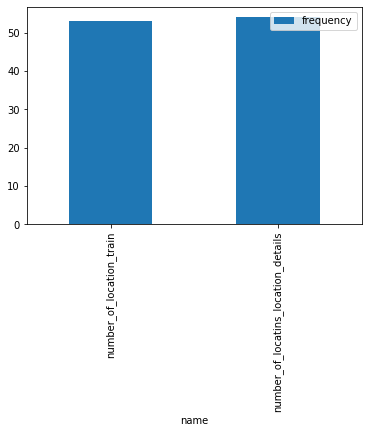

In [0]:
d.plot(x='name',y='frequency',kind='bar')

## Plot to show the number of locations in train data and locations file.

In [0]:
print(train['locationId'].unique())
print(location_details['location_id'].unique())

['location_25' 'location_1' 'location_2' 'location_3' 'location_4'
 'location_5' 'location_6' 'location_7' 'location_8' 'location_9'
 'location_10' 'location_11' 'location_12' 'location_13' 'location_14'
 'location_15' 'location_16' 'location_17' 'location_18' 'location_19'
 'location_23' 'location_24' 'location_26' 'location_27' 'location_28'
 'location_30' 'location_31' 'location_32' 'location_33' 'location_34'
 'location_35' 'location_37' 'location_38' 'location_39' 'location_40'
 'location_41' 'location_43' 'location_44' 'location_45' 'location_46'
 'location_47' 'location_48' 'location_49' 'location_50' 'location_51'
 'location_54' 'location_36' 'location_53' 'location_20' 'location_29'
 'location_21' 'location_42' 'location_22']
['location_1' 'location_2' 'location_3' 'location_4' 'location_5'
 'location_6' 'location_7' 'location_8' 'location_9' 'location_10'
 'location_11' 'location_12' 'location_13' 'location_14' 'location_15'
 'location_16' 'location_17' 'location_18' 'locatio

## **1'st insight **



1.   No of locations in train dataset=53
2.   No of locations in locations data set =54

Therefore either data is not recorded for that warehouse or the warehouse has no units in it.

### The ware house with no units sold is the ware house in chennai,Tamilnadu state (location_52)



In [0]:
##Checking the unique itemId's in train and items.
print(train['item_id'].nunique())
print(item_details['item_id'].nunique())

3890
4100


In [0]:
 set(item_details['item_id'].unique())-set(train['item_id'].unique()) 

{'item_1464607',
 'item_1467088',
 'item_1467093',
 'item_1921118',
 'item_2011437',
 'item_2011448',
 'item_2011450',
 'item_2011451',
 'item_2011457',
 'item_2011459',
 'item_2011468',
 'item_2011470',
 'item_2011471',
 'item_2015646',
 'item_2015898',
 'item_2027559',
 'item_2033554',
 'item_2035576',
 'item_2042614',
 'item_2043261',
 'item_2043559',
 'item_2043795',
 'item_2043849',
 'item_2045162',
 'item_2045545',
 'item_2046260',
 'item_2046805',
 'item_2046903',
 'item_2046916',
 'item_2047495',
 'item_2047496',
 'item_2047506',
 'item_2047508',
 'item_2047752',
 'item_2048164',
 'item_2048358',
 'item_2048399',
 'item_2048546',
 'item_2048596',
 'item_2048954',
 'item_2049003',
 'item_2049026',
 'item_2049081',
 'item_2049304',
 'item_2049778',
 'item_2051064',
 'item_2052563',
 'item_2053415',
 'item_2053564',
 'item_2053590',
 'item_2053610',
 'item_2053614',
 'item_2053630',
 'item_2053751',
 'item_2053874',
 'item_2054300',
 'item_2054580',
 'item_2054605',
 'item_2054635

# 2'nd Insight 

These are the list of items that can have less number of unit in the warehouses as these units are not at all sold in the last 4 years according to the data.

'item_1464607',
 'item_1467088',
 'item_1467093',
 'item_1921118',
 'item_2011437',
 'item_2011448',
 'item_2011450',
 'item_2011451',
 'item_2011457',
 'item_2011459',
 'item_2011468',
 'item_2011470',
 'item_2011471',
 'item_2015646',
 'item_2015898',
 'item_2027559',
 'item_2033554',
 'item_2035576',
 'item_2042614',
 'item_2043261',
 'item_2043559',
 'item_2043795',
 'item_2043849',
 'item_2045162',
 'item_2045545',
 'item_2046260',
 'item_2046805',
 'item_2046903',
 'item_2046916',
 'item_2047495',
 'item_2047496',
 'item_2047506',
 'item_2047508',
 'item_2047752',
 'item_2048164',
 'item_2048358',
 'item_2048399',
 'item_2048546',
 'item_2048596',
 'item_2048954',
 'item_2049003',
 'item_2049026',
 'item_2049081',
 'item_2049304',
 'item_2049778',
 'item_2051064',
 'item_2052563',
 'item_2053415',
 'item_2053564',
 'item_2053590',
 'item_2053610',
 'item_2053614',
 'item_2053630',
 'item_2053751',
 'item_2053874',
 'item_2054300',
 'item_2054580',
 'item_2054605',
 'item_2054635',
 'item_2054903',
 'item_2056557',
 'item_2056764',
 'item_2056876',
 'item_2057033',
 'item_2057387',
 'item_2057442',
 'item_2057762',
 'item_2058362',
 'item_2058758',
 'item_2058764',
 'item_2058895',
 'item_2059122',
 'item_2059277',
 'item_2059342',
 'item_2059647',
 'item_2059799',
 'item_2060787',
 'item_2060793',
 'item_2060910',
 'item_2061025',
 'item_2061033',
 'item_2061121',
 'item_2061214',
 'item_2061404',
 'item_2061781',
 'item_2062477',
 'item_2062912',
 'item_2067056',
 'item_2067123',
 'item_2067333',
 'item_2072545',
 'item_2075374',
 'item_2083837',
 'item_2083859',
 'item_2084278',
 'item_2084557',
 'item_2084706',
 'item_2086882',
 'item_2087374',
 'item_2087409',
 'item_2087543',
 'item_2087567',
 'item_2087933',
 'item_2087978',
 'item_2088922',
 'item_2088946',
 'item_2089036',
 'item_2089224',
 'item_2089250',
 'item_2089789',
 'item_2106464',
 'item_2109909',
 'item_2109969',
 'item_2110456',
 'item_2111684',
 'item_2112280',
 'item_2112303',
 'item_2112461',
 'item_2112462',
 'item_2112607',
 'item_2113343',
 'item_2113914',
 'item_2114566',
 'item_2114752',
 'item_2114812',
 'item_2116132',
 'item_2116139',
 'item_2116238',
 'item_2116416',
 'item_2116470',
 'item_2117783',
 'item_2118397',
 'item_2118662',
 'item_2120180',
 'item_2120216',
 'item_2120506',
 'item_2120681',
 'item_2120723',
 'item_2120768',
 'item_2121319',
 'item_2121610',
 'item_2121690',
 'item_2122188',
 'item_2122676',
 'item_2122818',
 'item_2122868',
 'item_2122947',
 'item_2123036',
 'item_2123209',
 'item_2123410',
 'item_2123463',
 'item_2123468',
 'item_2123711',
 'item_2123727',
 'item_2123747',
 'item_2123750',
 'item_2123775',
 'item_2123790',
 'item_2123791',
 'item_2123839',
 'item_2123859',
 'item_2123863',
 'item_2124705',
 'item_2125814',
 'item_2126696',
 'item_2126842',
 'item_2126944',
 'item_2127024',
 'item_2127069',
 'item_2127114',
 'item_2127175',
 'item_2127206',
 'item_2127544',
 'item_2127651',
 'item_2127733',
 'item_2127825',
 'item_2127921',
 'item_2127992',
 'item_2128628',
 'item_2128799',
 'item_2129334',
 'item_2129350',
 'item_2129387',
 'item_2129515',
 'item_2129616',
 'item_2129678',
 'item_2129786',
 'item_2129790',
 'item_2129892',
 'item_2129994',
 'item_2130131',
 'item_2130219',
 'item_2130265',
 'item_2130352',
 'item_2130474',
 'item_2130521',
 'item_2130526',
 'item_2130553',
 'item_2131010',
 'item_2131572',
 'item_2131699',
 'item_2132163',
 'item_2132318',
 'item_2132945',
 'item_2132957',
 'item_2134058',
 'item_2134244',
 'item_313094',
 'item_766493',
 'item_906981'



## Handling NA values

 Na values are preasent only in the train data set in the '**onpromotion**' column.


In [0]:
a=train.onpromotion.mode()
print(a)

0    False
dtype: object


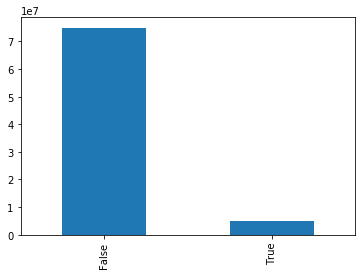

In [0]:
##So we found out that the mode is False so i decided to fill the na's with mode

pd.value_counts(train['onpromotion']).plot.bar()

Plot for value counts before handling NA values

In [0]:
train['onpromotion'].value_counts()

False    74970155
True      5060973
Name: onpromotion, dtype: int64

In [0]:
train.isna().sum()

date                  0
locationId            0
item_id               0
unit_sales            0
onpromotion    21657651
dtype: int64

In [0]:
train['onpromotion'] =train['onpromotion'].fillna(train['onpromotion'].mode()[0])

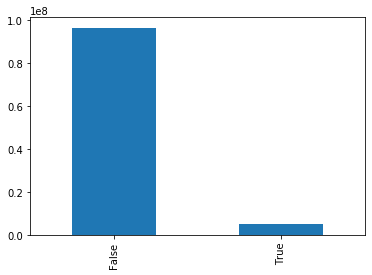

In [0]:
##plot of value counts of on promotion after filling the NA values

pd.value_counts(train['onpromotion']).plot.bar()

Plot after handling NA values after filling it with mode.

In [0]:
##Shape of train before Dropping duplicate values from
train.shape

(101688779, 5)

In [0]:
train=train.drop_duplicates()

In [0]:
##Shape of train after Dropping duplicate values from
train.shape

(101678735, 5)

In [0]:
##removing unit_sales which are less than zero as the sales can not be less than zero.After observing the description of train datai have noticed that
##unit_sales.min() are in negative


train[train['unit_sales']<0].shape

(6162, 5)

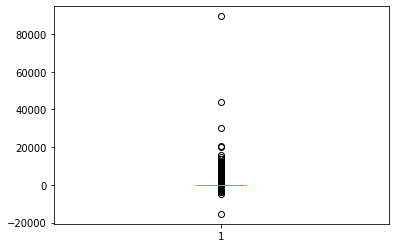

In [0]:
import matplotlib.pyplot as plt
plt.boxplot(train["unit_sales"])
plt.show()

Box plot of unit sales.

Through this plot i found out that there are negative unit_sales values.

These things should be handled.

In [0]:
##I'm not sure at this point if i should remove the negative unit sales.But let's just check the box plot.
#train=train[train.unit_sales >0]

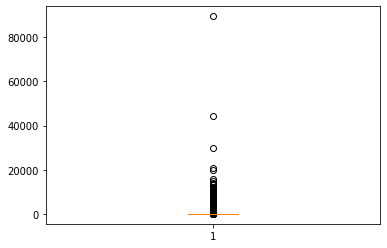

In [0]:
plt.boxplot(train[train.unit_sales >0])
plt.show()

Box plot after removing Negative unit_sales.

In [0]:
train.dtypes

date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
dtype: object

converting date data type from object to date

In [0]:
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')

In [0]:
train.dtypes

date           datetime64[ns]
locationId             object
item_id                object
unit_sales            float64
onpromotion            object
dtype: object

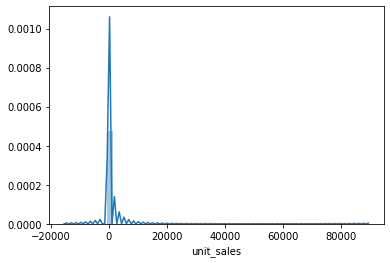

In [0]:
import seaborn as sns
sns.distplot(train['unit_sales'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


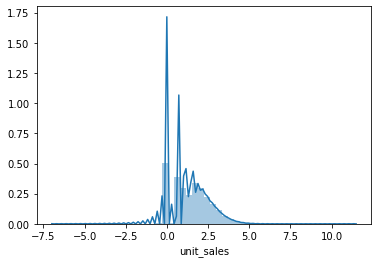

In [0]:
#Trying to check if log(train['unit_sales] make the plot better?)
import numpy as np

sns.distplot(np.log(train['unit_sales']))

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


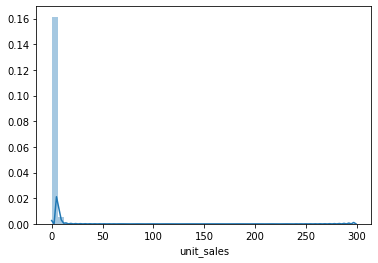

In [0]:
#Trying to check if sqrt(train['unit_sales] make the plot better?)
from math import sqrt
sns.distplot(np.sqrt(train['unit_sales']))

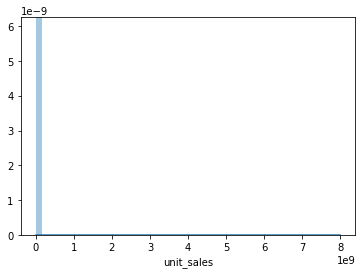

In [0]:
#square
sns.distplot(np.square(train['unit_sales']))

From this plot we can say that the unit_sales are highly right skewed which means that then mean is  less than median.

In [0]:
#checking meadian and mean values of train data set for unit_sales.
print(train['unit_sales'].mean())
print(train['unit_sales'].median())

8.649574701044651
4.0


In [0]:
##Feature engineering is imporatant for dates.For easy access of days months and year
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['year']=train['date'].dt.year

In [0]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion,month,day,year
0,2015-01-01,location_25,item_103665,7.0,NaN,1,1,2015
1,2015-01-01,location_25,item_105574,1.0,NaN,1,1,2015
2,2015-01-01,location_25,item_105575,2.0,NaN,1,1,2015
3,2015-01-01,location_25,item_108079,1.0,NaN,1,1,2015
4,2015-01-01,location_25,item_108701,1.0,NaN,1,1,2015


Merging train and location data by using location_id as the foreign key using inner join

In [0]:


merged=pd.merge(train,location_details,how='inner',left_on=['locationId'],right_on=['location_id'])

In [0]:
merged.head()

,date,locationId,item_id,unit_sales,onpromotion,month,day,year,location_id,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,1,1,2015,location_25,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,1,1,2015,location_25,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,1,1,2015,location_25,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,1,1,2015,location_25,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,1,1,2015,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
merged.shape

(101672573, 13)

Pickle to avoid crashing of google colab.

In [0]:
import pickle
pickle_out=open('merge.pickle','wb')
pickle.dump(merged,pickle_out)
pickle_out.close()

In [0]:
import pickle
pickle_in=open('merge.pickle','rb')
merge=pickle.load(pickle_in)

In [0]:
import pickle
pickle_out=open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [0]:
import pickle
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)

pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)

In [0]:
x.head()

,item_id,onpromotion,month,day,year,location_id,city,state,cluster
0,44,False,1,1,2015,14,10,11,1
1,118,False,1,1,2015,14,10,11,1
2,119,False,1,1,2015,14,10,11,1
3,168,False,1,1,2015,14,10,11,1
4,195,False,1,1,2015,14,10,11,1


In [0]:
y.head()

0    7.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: unit_sales, dtype: float64

merging on item_details

In [0]:
##merging on item_details
merged=pd.merge(merged,item_details,how='inner',left_on=['item_id'],right_on=['item_id'])

In [0]:
merged.shape

(101682617, 16)

In [0]:
##Looking at the data after merging
merged.head()

,date,locationId,item_id,unit_sales,onpromotion,month,day,year,location_id,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,1,1,2015,location_25,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
1,2015-01-02,location_25,item_103665,5.0,NaN,1,2,2015,location_25,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2015-01-04,location_25,item_103665,5.0,NaN,1,4,2015,location_25,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
3,2015-01-05,location_25,item_103665,5.0,NaN,1,5,2015,location_25,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
4,2015-01-06,location_25,item_103665,7.0,NaN,1,6,2015,location_25,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1


In [0]:
##For memory Optimization


merged['city']=merged['city'].astype('category')
merged['state']=merged['state'].astype('category')
merged['category_of_item']=merged['category_of_item'].astype('category')
merged['type']=merged['type'].astype('category')
merged['class']=merged['class'].astype('category')


In [0]:
import pickle

In [0]:
import pickle
pickle_out=open('merged.pickle','wb')
pickle.dump(merged,pickle_out)
pickle_out.close()

In [0]:
pickle_in=open('merge.pickle','rb')
merge=pickle.load(pickle_in)

In [0]:
##Subsetting data frame for first 15 days of all years just to look at the sales for first 15 days

Data_for_15Days=merged[(merged['day']<16) & (merged['month']==1)]

In [0]:
Data_for_15Days.shape

(3614582, 13)

In [0]:
import pickle
pickle_out=open('Data_for_15Days.pickle','wb')
pickle.dump(Data_for_15Days,pickle_out)
pickle_out.close()

In [0]:
import pickle

In [0]:
pickle_in=open('Data_for_15Days.pickle','rb')
merge=pickle.load(pickle_in)

In [0]:
merge.tail()

,date,locationId,item_id,unit_sales,onpromotion,month,day,year,location_id,city,state,type,cluster
101215580,2018-01-15,location_22,item_2026858,1.0,False,1,15,2018,location_22,Gandhinagar,Gujarat,C,7
101215581,2018-01-15,location_22,item_2026945,4.0,False,1,15,2018,location_22,Gandhinagar,Gujarat,C,7
101215582,2018-01-15,location_22,item_2026983,2.0,False,1,15,2018,location_22,Gandhinagar,Gujarat,C,7
101215583,2018-01-15,location_22,item_2027090,2.0,False,1,15,2018,location_22,Gandhinagar,Gujarat,C,7
101215584,2018-01-15,location_22,item_2027252,2.0,False,1,15,2018,location_22,Gandhinagar,Gujarat,C,7


In [0]:
Data_for_15Days=merge

In [0]:
!pip install pandasql

In [0]:
import pandasql as ql

In [0]:
q="""SELECT year,cluster,sum(unit_sales) as sales FROM Data_for_15Days GROUP BY cluster,year """
df=pd.DataFrame(ql.sqldf(q,locals()))

In [0]:
df.shape

(68, 3)

In [0]:
df.head()

,year,cluster,sales
0,2015,1,275367.3610
1,2016,1,505598.2049
2,2017,1,395286.9460
3,2018,1,580622.4380
4,2015,2,115703.8470


In [0]:
df1.head()

,cluster,sum(sales)
0,1,1.756875e+06
1,2,8.610506e+05
2,3,2.291174e+06
3,4,1.611779e+06
4,5,2.036079e+06


In [0]:
df1.shape

(17, 2)

In [0]:
Data_for_15Days

<Figure size 1008x1152 with 0 Axes>

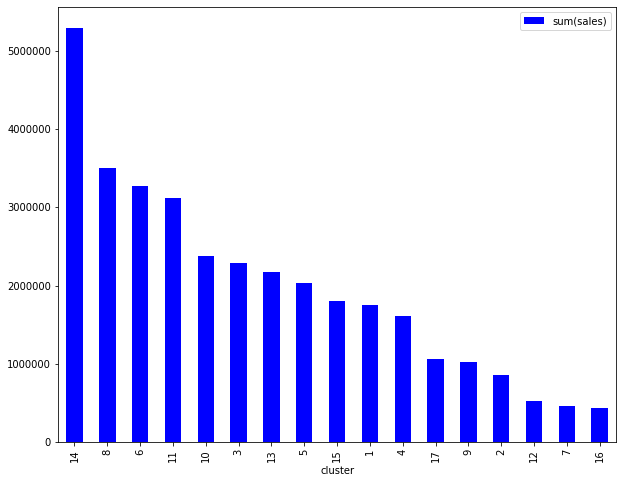

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,16))
df1.sort_values('sum(sales)',ascending=False,inplace=True)
df1.plot(kind='bar',y='sum(sales)',x='cluster',color='b',figsize=(10,8))

## This is the barplot of the cluster based on their sales in previous years in descending order.

In [0]:
q="""SELECT cluster,sum(sales) FROM df GROUP BY cluster """
df1=pd.DataFrame(ql.sqldf(q,locals()))

In [0]:
##merging on item_details
items_cluser14=pd.merge(Data_for_15Days,item_details,how='inner',left_on=['item_id'],right_on=['item_id'])

In [0]:
items_cluser14.tail()

,date,locationId,item_id,unit_sales,onpromotion,month,day,year,location_id,city,state,type,cluster,category_of_item,class,perishable
3614569,2018-01-11,location_50,item_1919674,1.0,False,1,11,2018,location_50,Gurgaon,Haryana,A,14,personal_care,class_4138,0
3614570,2018-01-15,location_50,item_1919674,1.0,False,1,15,2018,location_50,Gurgaon,Haryana,A,14,personal_care,class_4138,0
3614571,2016-01-04,location_47,item_1421429,12.0,False,1,4,2016,location_47,Bengaluru,Karnataka,A,14,beverages,class_1136,0
3614572,2016-01-06,location_47,item_1421429,11.0,False,1,6,2016,location_47,Bengaluru,Karnataka,A,14,beverages,class_1136,0
3614573,2016-01-12,location_47,item_1421429,12.0,False,1,12,2016,location_47,Bengaluru,Karnataka,A,14,beverages,class_1136,0


In [0]:
items_cluser14=items_cluser14[items_cluser14['cluster']==14]

In [0]:
items_cluser14.shape

(389013, 16)

In [0]:
items_cluser14['cluster'].nunique()

1

In [0]:
q="""SELECT cluster,item_id,sum(unit_sales) FROM items_cluser14 GROUP BY item_id """
df3=pd.DataFrame(ql.sqldf(q,locals()))

In [0]:
df3.head()

,cluster,item_id,sum(unit_sales),item_id
0,14,item_1000866,136.0,item_1000866
1,14,item_1001305,1108.0,item_1001305
2,14,item_1003679,1831.0,item_1003679
3,14,item_1004545,70.0,item_1004545
4,14,item_1004550,3696.0,item_1004550


In [0]:
top_10_items.head()

,cluster,item_id,sum(unit_sales),item_id
2516,14,item_584028,49807.7425,item_584028
2752,14,item_807493,38377.0000,item_807493
282,14,item_1143685,35651.0000,item_1143685
1445,14,item_159156,31413.2256,item_159156
1164,14,item_1463992,30094.0000,item_1463992


In [0]:
df3.shape

(3097, 4)

In [0]:
top_10_items=df3.sort_values('sum(unit_sales)',ascending=False).head(10)

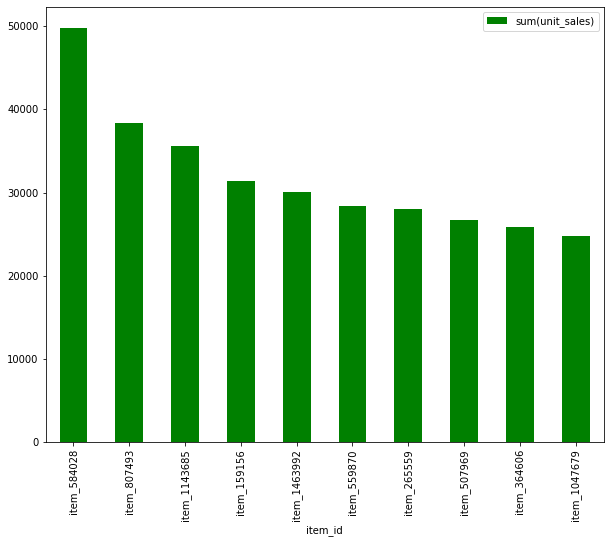

In [0]:
top_10_items.plot(kind='bar',x='item_id',y='sum(unit_sales)',color='g',figsize=(10,8))

## This is the bar plot of sales of top 10 items in the first 15 days of january in cluster 14.

In [0]:
##Rate of purchase per week

##Rate of purchase for different item Id's per week
top_10_items['sum(unit_sales)']=top_10_items['sum(unit_sales)']/2

In [0]:
##Rate of purchase for different item Id's per week
top_10_items.head(10)

,cluster,item_id,sum(unit_sales)
2516,14,item_584028,24903.87125
2752,14,item_807493,19188.50000
282,14,item_1143685,17825.50000
1445,14,item_159156,15706.61280
1164,14,item_1463992,15047.00000
2456,14,item_559870,14188.00000
2076,14,item_265559,14034.50000
2392,14,item_507969,13320.55085
2213,14,item_364606,12914.00000
64,14,item_1047679,12389.50000


In [0]:
q="""SELECT year,sum(unit_sales) as sales FROM items_cluser14 GROUP BY year """
df4=pd.DataFrame(ql.sqldf(q,locals()))

In [0]:
from sklearn.linear_model import LinearRegression
x=pd.DataFrame(df4['year'])
y=pd.DataFrame(df4['sales'])

model = LinearRegression()
model.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
d=pd.DataFrame()
d['year']=[2019]

In [0]:
model.predict(d)

array([[1821611.86399996]])

**1821611.86399996** is the basic prediction of sum of unit_sales for first 15 days of 2019 for cluster 14.

This can be used to cross check with the model we have created next.

In [0]:
train_trans.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [0]:
q5="""SELECT location_identifier,sum(transactions) as transactions FROM train_trans GROUP BY  location_identifier"""
transactions_df=pd.DataFrame(ql.sqldf(q5,locals()))

In [0]:
transactions_df.shape

(53, 2)

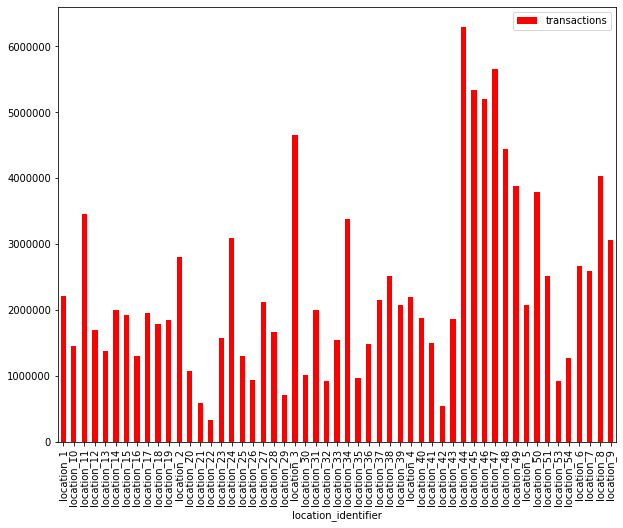

In [0]:
transactions_df.plot(kind='bar',x='location_identifier',y='transactions',color='r',figsize=(10,8))

After sorting the sum of transactions for each location identifier

<Figure size 1008x1152 with 0 Axes>

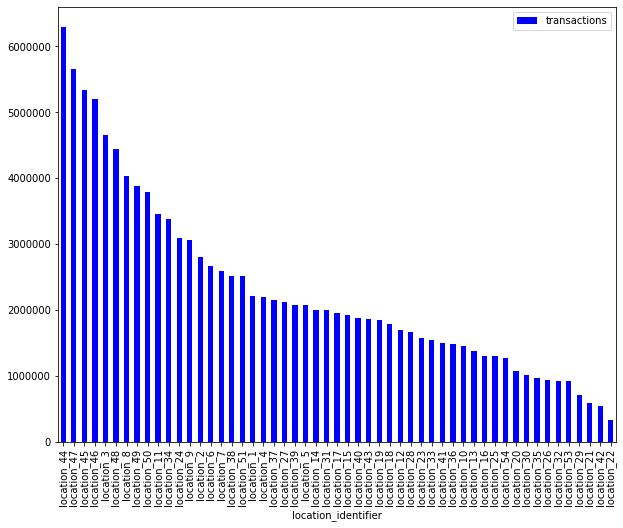

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,16))
transactions_df.sort_values('transactions',ascending=False,inplace=True)
transactions_df.plot(kind='bar',y='transactions',x='location_identifier',color='b',figsize=(10,8))

From this we can deduce that location 44 has maximum number of transactions being made.

## PreProcessing Of Train and test Data

In [0]:
import pandas as pd
train=pd.read_csv('train (1).csv')
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')
##Feature engineering is imporatant for dates.For easy access of days months and year

train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['year']=train['date'].dt.year
test=pd.read_csv('test.csv')
test['item_id']=test['item_id'].astype('category')

train['item_id']=train['item_id'].astype('category')
test['item_id']=test['item_id'].astype('category')

train_items=train['item_id'].cat.categories.tolist()
test_items=test['item_id'].cat.categories.tolist()

import numpy as np
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans


items_not_in_train=setdiff_sorted(test_items,train_items)


items_labels=train_items + items_not_in_train


encode = list(range(len(items_labels)))
dic_items=dict(zip(items_labels,encode))

train['item_id']=train['item_id'].map(dic_items)
train['item_id']=train['item_id'].astype('int32')


test['item_id']=test['item_id'].map(dic_items)
test['item_id']=test['item_id'].astype('int32')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['locationId'])

train['locationId']=le.transform(train['locationId'])
test['locationId']=le.transform(test['locationId'])
test.to_csv('test_prep.csv')
##Feature engineering is imporatant for dates.For easy access of days months and year
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d')
test['month']=test['date'].dt.month

test['day']=test['date'].dt.day
test['year']=test['date'].dt.year

test=test.drop('date',axis=1)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
train['onpromotion']=train['onpromotion'].astype('bool')

In [0]:
train['onpromotion']=train['onpromotion'].fillna(train['onpromotion'].mode())

In [0]:
train.head()

,locationId,item_id,unit_sales,onpromotion,month,day,year
38594264,17,45,12.0,False,1,1,2017
38594265,17,121,23.0,False,1,1,2017
38594266,17,194,1.0,False,1,1,2017
38594267,17,196,6.0,False,1,1,2017
38594268,17,201,6.0,False,1,1,2017


In [0]:
test=test.drop('id',axis=1)

In [0]:
test.head()

,locationId,item_id,onpromotion,month,day,year
0,17,3880,False,1,1,2019
1,17,45,False,1,1,2019
2,17,120,False,1,1,2019
3,17,133,False,1,1,2019
4,17,144,False,1,1,2019


In [0]:
train=train.drop('date',axis=1)

In [0]:
train.head()

,locationId,item_id,unit_sales,onpromotion,month,day,year
0,17,45,7.0,True,1,1,2015
1,17,120,1.0,True,1,1,2015
2,17,121,2.0,True,1,1,2015
3,17,170,1.0,True,1,1,2015
4,17,197,1.0,True,1,1,2015


In [0]:
test.head()

,locationId,item_id,onpromotion,month,day,year
0,17,3880,False,1,1,2019
1,17,45,False,1,1,2019
2,17,120,False,1,1,2019
3,17,133,False,1,1,2019
4,17,144,False,1,1,2019


In [0]:
train=train[train['year']>2016]

In [0]:
train.shape

(63094515, 7)

In [0]:
y=train['unit_sales']
X=train.drop('unit_sales',axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 1
)

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:

def mean_absolute_percentage_error(y_true, y_pred): 
  

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
y_preds_linear=model.predict(X_train)

MAPE of linear on train Data is :**237.5323131915676**

In [0]:
import numpy as np
mean_absolute_percentage_error(np.array(y_train),y_preds_linear)

237.5323131915676

In [0]:
y_preds_test_linear=model.predict(X_test)

MAPE of linear on train Data is :237.43550513937174

In [0]:
mean_absolute_percentage_error(np.array(y_test),y_preds_test_linear)

237.43550513937174

# Linear regression
**Train MAPE**:-237.5323131915676

**Test MAPE**:-237.43550513937174


**Conclusion**:In linear regression there is no over fit or under fit as the train and test MAPE are almost same.
But the MAPE is not good,So i'm trying for better models after this.

Trying Decision tree regressor.With max depth as 8.

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 8,
                             #max_leaf_nodes = 10 
                             )
tree.fit(X_train,y_train)
y_pred=tree.predict(X_train)

In [0]:
mean_absolute_percentage_error(np.array(y_train),y_pred)

210.60635942182307

In [0]:
y_pred_test_decision=tree.predict(X_test)

In [0]:
mean_absolute_percentage_error(np.array(y_test),y_pred_test_decision)

210.49357286330212

# Decision Tree
**Train MAPE**:-210.60635942182307


**Test MAPE**:-210.49357286330212

**Conclusion**:- From the above observation i can say that decision tree is working better than Linear regression as the MAPE for decision tree is much better.But i can still improve acuracy by applying ensembles to it.

# Application of Random Forest and XG Boost.Without train and split because i have good number of submissions left for the day.

In [0]:
#cd '/content/drive/My Drive/8FEB'

Same Pre Preocessing Steps.

In [0]:
import pandas as pd
train=pd.read_csv('train (1).csv')
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')
##Feature engineering is imporatant for dates.For easy access of days months and year

train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['year']=train['date'].dt.year

test=pd.read_csv('test.csv')
test['item_id']=test['item_id'].astype('category')

train['item_id']=train['item_id'].astype('category')
test['item_id']=test['item_id'].astype('category')

train_items=train['item_id'].cat.categories.tolist()
test_items=test['item_id'].cat.categories.tolist()

import numpy as np
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans


items_not_in_train=setdiff_sorted(test_items,train_items)


items_labels=train_items + items_not_in_train


encode = list(range(len(items_labels)))
dic_items=dict(zip(items_labels,encode))

train['item_id']=train['item_id'].map(dic_items)
train['item_id']=train['item_id'].astype('int32')


test['item_id']=test['item_id'].map(dic_items)
test['item_id']=test['item_id'].astype('int32')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['locationId'])

train['locationId']=le.transform(train['locationId'])
test['locationId']=le.transform(test['locationId'])



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
items=pd.read_csv('item_details.csv')

In [0]:
train['item_id'].nunique()

3890

In [0]:
test['item_id'].nunique()

3828

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [0]:
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')

In [0]:
train['day']=train['date'].dt.day
train['month']=train['date'].dt.month
train['year']=train['date'].dt.year

In [0]:
y=train['onpromotion']
X=train.drop('onpromotion',axis=1)

In [0]:
X['onpromotion']=X['onpromotion'].fillna(X['onpromotion'].mode())
X['onpromotion']=X['onpromotion'].astype('bool')
X=X.drop('date',axis=1)
y.columns=['a','unit_sales']
y1 = y['unit_sales']
X=X.drop('Unnamed: 0',axis=1)

In [0]:
X.head()

,locationId,item_id,onpromotion,month,day,year
0,17,45,False,1,1,2015
1,17,120,True,1,1,2015
2,17,121,True,1,1,2015
3,17,170,True,1,1,2015
4,17,197,True,1,1,2015


In [0]:
y.head()

,a,unit_sales
0,0,7.0
1,1,1.0
2,2,2.0
3,3,1.0
4,4,1.0


In [0]:
X.shape

(101688779, 6)

In [0]:
X.head()

,locationId,item_id,onpromotion,month,day,year
0,17,45,False,1,1,2015
1,17,120,True,1,1,2015
2,17,121,True,1,1,2015
3,17,170,True,1,1,2015
4,17,197,True,1,1,2015


In [0]:
X.tail()

,locationId,item_id,onpromotion,month,day,year
101688774,48,2599,True,12,31,2018
101688775,48,2601,False,12,31,2018
101688776,48,2602,False,12,31,2018
101688777,48,2603,False,12,31,2018
101688778,48,2607,False,12,31,2018


In [0]:
y.tail()

,a,unit_sales
101688774,101688774,6.0
101688775,101688775,4.0
101688776,101688776,10.0
101688777,101688777,3.0
101688778,101688778,1.0


In [0]:
X[(X['month']==1) & (X['day']==1) & (X['year']==2017)]

,locationId,item_id,onpromotion,month,day,year
38594264,17,45,False,1,1,2017
38594265,17,121,False,1,1,2017
38594266,17,194,False,1,1,2017
38594267,17,196,False,1,1,2017
38594268,17,201,False,1,1,2017
...,...,...,...,...,...,...
38595435,17,973,False,1,1,2017
38595436,17,974,False,1,1,2017
38595437,17,976,False,1,1,2017
38595438,17,977,False,1,1,2017


In [0]:
X.tail()

,locationId,item_id,onpromotion,month,day,year
101688774,48,2599,True,12,31,2018
101688775,48,2601,False,12,31,2018
101688776,48,2602,False,12,31,2018
101688777,48,2603,False,12,31,2018
101688778,48,2607,False,12,31,2018


In [0]:
print(y.loc[101688778])
print(new_y.loc[101688778])

a             101688778.0
unit_sales            1.0
Name: 101688778, dtype: float64
a             101688778.0
unit_sales            1.0
Name: 101688778, dtype: float64


In [0]:
new_X=X.loc[38594264:101688778]
new_y=y.loc[38594264:101688778]

In [0]:
new_X.shape

(63094515, 6)

In [0]:
new_y.shape

(63094515, 2)

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
regressor = RandomForestRegressor(n_estimators=150, min_samples_split=2,max_depth=3)
regressor.fit(new_X, new_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
preds=regressor.predict(new_X)

In [0]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [0]:
import pickle
pickle_out=open('model.pickle','wb')
pickle.dump(a,pickle_out)
pickle_out.close()

In [0]:
import pickle

pickle_in=open('model.pickle','rb')
b=pickle.load(pickle_in)

In [0]:
b

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_true

,unit_sales
0,7.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
101688774,6.0
101688775,4.0
101688776,10.0
101688777,3.0


In [0]:
pred_X=b.predict(X)

In [0]:
import numpy as np
rmsle(pred_X,np.array(y_true))

95.87501325711949

# Random Forest:

MAPE Of random forest:-95.87501325711949

Compared to my previous models random forest worked really good it is an ensemble to improve the accuracy.I am pretty sure there is no over fit as i"ve specified the max_depth  to be 3.

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,17,3880,False
1,1,2019-01-01,17,45,False
2,2,2019-01-01,17,120,False
3,3,2019-01-01,17,133,False
4,4,2019-01-01,17,144,False


In [0]:
##Feature engineering is imporatant for dates.For easy access of days months and year
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d')
test['month']=test['date'].dt.month

test['day']=test['date'].dt.day
test['year']=test['date'].dt.year

test=test.drop('date',axis=1)

In [0]:
test.head()

,id,locationId,item_id,onpromotion,month,day,year
0,0,17,3880,False,1,1,2019
1,1,17,45,False,1,1,2019
2,2,17,120,False,1,1,2019
3,3,17,133,False,1,1,2019
4,4,17,144,False,1,1,2019


In [0]:
test_going_to_predict=test.drop('id',axis=1)

In [0]:
test_preds=b.predict(test_going_to_predict)

In [0]:
Lets_gp=pd.DataFrame(test_preds)

In [0]:
Lets_gp.to_csv('My_Last_Wish.csv')

# Applying XG Boost.

In [0]:
import xgboost
model = xgboost.XGBRegressor(
                                
                 learning_rate=0.09,
                 max_depth=3,
                 
                 n_estimators=100,                                                                    
                 
                 reg_lambda=0.45,
                 
                 seed=42) 

In [0]:
y.head()

38594264    12.0
38594265    23.0
38594266     1.0
38594267     6.0
38594268     6.0
Name: unit_sales, dtype: float64

In [0]:
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:15] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.09, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=1, verbosity=1)

In [0]:
preds=model.predict(X)

In [0]:
import numpy as np
rmsle(preds,np.array(new_y))

47.16170449280957

In [0]:
test_preds=model.predict(test)

In [0]:
pd.DataFrame(test_preds).to_csv('SaveMe.csv')

# XG BOOST

MAPE of Xg Boost:-47.16170449280957

I have check MAPE on only train because i want my model to be trained with complete data.I made sure that there is no over fitting by making sure that the max_depth is set to 3.

## Applying light gbm model.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
ls

drive/  sample_data/


In [0]:
cd "/content/drive/My Drive//"

/content/drive/My Drive


In [0]:
cd '8FEB/'

/content/drive/My Drive/8FEB


# **Same Prepreocessing steps.**

In [0]:
train=pd.read_csv('train (1).csv')
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')
##Feature engineering is imporatant for dates.For easy access of days months and year

train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['year']=train['date'].dt.year

test=pd.read_csv('test.csv')
test['item_id']=test['item_id'].astype('category')

train['item_id']=train['item_id'].astype('category')
test['item_id']=test['item_id'].astype('category')

train_items=train['item_id'].cat.categories.tolist()
test_items=test['item_id'].cat.categories.tolist()

import numpy as np
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans


items_not_in_train=setdiff_sorted(test_items,train_items)


items_labels=train_items + items_not_in_train


encode = list(range(len(items_labels)))
dic_items=dict(zip(items_labels,encode))

train['item_id']=train['item_id'].map(dic_items)
train['item_id']=train['item_id'].astype('int32')


test['item_id']=test['item_id'].map(dic_items)
test['item_id']=test['item_id'].astype('int32')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['locationId'])

train['locationId']=le.transform(train['locationId'])
test['locationId']=le.transform(test['locationId'])
test.to_csv('test_prep.csv')
##Feature engineering is imporatant for dates.For easy access of days months and year
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d')
test['month']=test['date'].dt.month

test['day']=test['date'].dt.day
test['year']=test['date'].dt.year

test=test.drop('date',axis=1)


In [0]:
test.head()

,id,locationId,item_id,onpromotion,month,day,year
0,0,17,3880,False,1,1,2019
1,1,17,45,False,1,1,2019
2,2,17,120,False,1,1,2019
3,3,17,133,False,1,1,2019
4,4,17,144,False,1,1,2019


In [0]:
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')

In [0]:
train.head()

,date,locationId,item_id,unit_sales,onpromotion,month,day,year
0,2015-01-01,location_25,item_103665,7.0,NaN,1,1,2015
1,2015-01-01,location_25,item_105574,1.0,NaN,1,1,2015
2,2015-01-01,location_25,item_105575,2.0,NaN,1,1,2015
3,2015-01-01,location_25,item_108079,1.0,NaN,1,1,2015
4,2015-01-01,location_25,item_108701,1.0,NaN,1,1,2015


In [0]:
##Feature engineering is imporatant for dates.For easy access of days months and year

train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['year']=train['date'].dt.year

In [0]:
train['onpromotion']=train['onpromotion'].fillna(False)

In [0]:
train=train[tain.year>2016]
y=train['unit_sales']
X=train.drop('unit_sales',axis=1)

In [0]:
train.shape
train.to_csv('train_prep.csv')
test.to_csv('test_prep.csv')

In [0]:
train_prep=pd.read_csv('train_prep.csv')
test_prep=pd.read_csv('test_prep.csv')

In [0]:
train.head()

,locationId,item_id,unit_sales,onpromotion,month,day,year
38594264,17,45,12.0,False,1,1,2017
38594265,17,121,23.0,False,1,1,2017
38594266,17,194,1.0,False,1,1,2017
38594267,17,196,6.0,False,1,1,2017
38594268,17,201,6.0,False,1,1,2017


In [0]:
X['onpromotion']=X['onpromotion'].fillna(X['onpromotion'].mode())

In [0]:
X['onpromotion']=X['onpromotion'].astype('bool')

In [0]:
X=X.drop('date',axis=1)

In [0]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


**# Applying lightgbm model**

In [0]:
import lightgbm as lgb

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0, 
    }
n_estimators = 10

n_iters = 2
preds_buf = []
err_buf = []
for i in range(n_iters): 
    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=i)
    d_train = lgb.Dataset(x_train, label=y_train)
    d_valid = lgb.Dataset(x_valid, label=y_valid)
    watchlist = [d_valid]

    model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

    preds = model.predict(x_valid)
    preds = np.exp(preds)
    preds[preds < 0] = median_trip_duration
    err = rmsle(np.exp(y_valid), preds)
    err_buf.append(err)
    print('RMSLE = ' + str(err))
    
    preds = model.predict(test)
    preds = np.exp(preds)
    preds[preds < 0] = median_trip_duration
    preds_buf.append(preds)

print('Mean RMSLE = ' + str(np.mean(err_buf)) + ' +/- ' + str(np.std(err_buf)))
# Average predictions
preds = np.mean(preds_buf, axis=0)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


RMSLE = 19475147404.08331
RMSLE = 31424732206.728096
Mean RMSLE = 25449939805.4057 +/- 5974792401.322393


Light gbm failed miserably because of the parameters.

In [0]:

def mean_absolute_percentage_error(y_true, y_pred): 
  

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

In [0]:
rmse_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [0]:
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=1))

In [0]:
import numpy as np

depths = np.arange(1, 21)
depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [0]:
num_leafs = [1, 5, 10, 20, 50, 100]

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]

In [0]:
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10)

In [0]:
gs = gs.fit(X_train_and_validate, y_train_and_validate)

Tried grid search with DT regressor.But it took 1 day to execute but still did not show up the model.Maybe because my cv was 10 :p.

In [0]:
X.shape

(101688779, 6)

## **Applying Lightgbm with different parameters.**

In [0]:
import lightgbm as lgb

d_train = lgb.Dataset(X, label= y)

In [0]:
params = {}
params['learning_rate']= 0.003
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='MAPE'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=10

In [0]:
clf= lgb.train(params, d_train, 150)

In [0]:
y_preds=clf.predict(X)

In [0]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [0]:
import numpy as np

rmse(y_preds,np.array(y))

739.8818920429869

## Lightgbm Observation

Lightgbm i checked rmse on train:-739.88 which is a good figure.

When i submitted it the score was around 63.3

So this gave me a good result.:p

In [0]:
test=test.drop('id',axis=1)

In [0]:
test_preds=clf.predict(test)

In [0]:
test_preds

array([0.99994038, 0.99993917, 0.99993917, ..., 0.99993363, 0.99993363,
       0.99993363])

In [0]:
df=pd.DataFrame(test_preds)

In [0]:
df.to_csv('test_predictionsss.csv')

In [0]:
y_preds

In [0]:
new_y

38594264     12.0
38594265     23.0
38594266      1.0
38594267      6.0
38594268      6.0
             ... 
101688774     6.0
101688775     4.0
101688776    10.0
101688777     3.0
101688778     1.0
Name: unit_sales, Length: 63094515, dtype: float64

In [0]:
##new_test.csv consists of test data along with it's predictions

In [0]:
import pandas as pd

In [0]:
test=pd.read_csv('new_test.csv')

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,unit_sales
0,0,01-01-2019,location_25,item_99197,False,1.593629
1,1,01-01-2019,location_25,item_103665,False,1.582322
2,2,01-01-2019,location_25,item_105574,False,1.582322
3,3,01-01-2019,location_25,item_105857,False,1.582322
4,4,01-01-2019,location_25,item_106716,False,1.582322


In [0]:
!pip install pandasql

In [0]:
import pandasql as ps

In [0]:
## converting to total sales from the subset data with respect to cluster and converting it data frame

qt1 = """SELECT cluster,sum(unit_sales) as tot_sales FROM test GROUP BY cluster"""

dt1= pd.DataFrame(ps.sqldf(qt1, locals()))

In [0]:
dt1.head()

,cluster,tot_sales
0,1,113115.731735
1,2,79686.878967
2,3,167920.311148
3,4,115011.419278
4,5,55823.752216


In [0]:
location=pd.read_csv('location_details.csv')

In [0]:
location.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [0]:
test=pd.merge(test,location,how='inner',left_on=['locationId'],right_on=['location_id'])

In [0]:
merged.head()

,id,date,locationId,item_id,onpromotion,unit_sales,location_id,city,state,type,cluster
0,0,01-01-2019,location_25,item_99197,False,1.593629,location_25,Kanpur,Uttar Pradesh,D,1
1,1,01-01-2019,location_25,item_103665,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1
2,2,01-01-2019,location_25,item_105574,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1
3,3,01-01-2019,location_25,item_105857,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1
4,4,01-01-2019,location_25,item_106716,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
test=test.drop('locationId',axis=1)

In [0]:
test.head()

,id,date,item_id,onpromotion,unit_sales,location_id,city,state,type,cluster
0,0,01-01-2019,item_99197,False,1.593629,location_25,Kanpur,Uttar Pradesh,D,1
1,1,01-01-2019,item_103665,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1
2,2,01-01-2019,item_105574,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1
3,3,01-01-2019,item_105857,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1
4,4,01-01-2019,item_106716,False,1.582322,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
## converting to total sales from the subset data with respect to cluster and converting it data frame

qt1 = """SELECT cluster,sum(unit_sales) as tot_sales FROM test GROUP BY cluster"""

dt1= pd.DataFrame(ps.sqldf(qt1, locals()))

In [0]:
dt1.head(20)

,cluster,tot_sales
0,1,113115.731735
1,2,79686.878967
2,3,167920.311148
3,4,115011.419278
4,5,55823.752216
5,6,225803.435963
6,7,53809.939389
7,8,146618.694572
8,9,79457.739138
9,10,196154.429497


Text(0.5, 1.0, 'total sales of different clusters')

<Figure size 1008x1152 with 0 Axes>

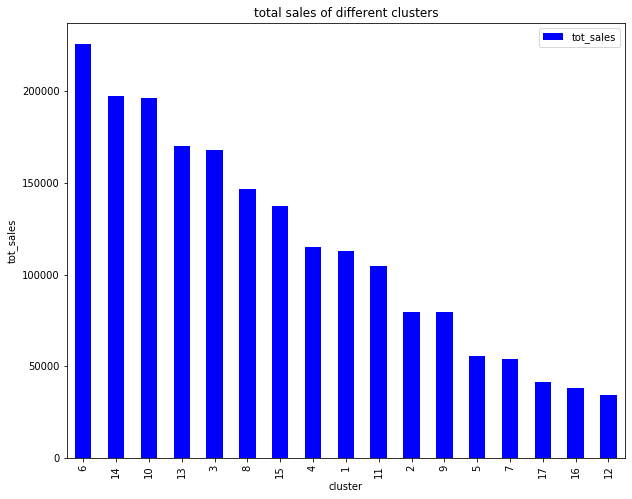

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,16))
dt1.sort_values('tot_sales',ascending=False,inplace=True)
dt1.plot(kind='bar',y='tot_sales',x='cluster',color='b',figsize=(10,8))
plt.ylabel('tot_sales')
plt.title('total sales of different clusters')

In [0]:
dat2= test.loc[test['cluster']==6,['cluster','item_id','unit_sales','type']]   ## observations from 14th cluster


In [0]:
## calculating the sum of unit sales of cluster 14 with respect to items to know the top selling items

qt2 = """SELECT cluster,item_id,sum(unit_sales) as tot_sales FROM dat2 GROUP BY item_id"""

dt2= pd.DataFrame(ps.sqldf(qt2, locals()))

In [0]:
dt2.head()

,cluster,item_id,tot_sales
0,6,item_1001305,85.830069
1,6,item_1003679,106.007065
2,6,item_1004550,103.316201
3,6,item_1004551,73.426414
4,6,item_1005456,14.230820


In [0]:
## sorting the top 10 selling items in cluster 14

test_item_10=dt2.sort_values('tot_sales',ascending=False).head(10)

Text(0.5, 1.0, 'top 10 selling items in cluster 14')

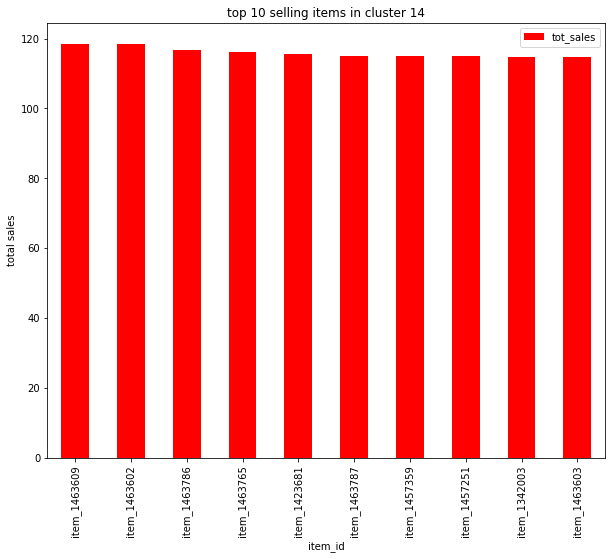

In [0]:
## plot for top 10 selling items in cluster 14

test_item_10.plot(kind='bar',x='item_id',y='tot_sales',color='r',figsize=(10,8))
print('\n')
plt.ylabel('total sales')
plt.title('top 10 selling items in cluster 14')

In [0]:
test_item_10.head()

,cluster,item_id,tot_sales
974,6,item_1463609,59.269992
971,6,item_1463602,59.269992
993,6,item_1463786,58.421207
984,6,item_1463765,58.120578
831,6,item_1423681,57.834589


In [0]:
test_item_10.shape

(10, 3)

In [0]:
test_item_10['tot_sales']=test_item_10['tot_sales']/2

In [0]:
Rate_of_Purchase_per_week=test_item_10.head(10)

In [0]:
Rate_of_Purchase_per_week

,cluster,item_id,tot_sales
974,6,item_1463609,59.269992
971,6,item_1463602,59.269992
993,6,item_1463786,58.421207
984,6,item_1463765,58.120578
831,6,item_1423681,57.834589
994,6,item_1463787,57.581919
925,6,item_1457359,57.494012
917,6,item_1457251,57.494012
641,6,item_1342003,57.375195
972,6,item_1463603,57.371616


# Conclusion 
From This we can conclude that the cluster 6 is the one with more number of sales and also the top ten items of these cluster are being stored.And the rate of purchase of these items are stored in the  Rate_of_Purchase_per_week Data frame.



